### import libraries

In [239]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay
from skimage.transform import resize
from sklearn.utils import shuffle


In [154]:
pwd

'C:\\Users\\USER\\Documents\\Edure\\Deep Learning\\Capstone Project\\Deep learning Capstone projects\\Cotton Plant Disease Dataset'

In [156]:
import glob

In [157]:
Aphids = glob.glob("Cotton plant/Cotton plant/Aphids/*.jpg")
Army_worm = glob.glob("Cotton plant/Cotton plant/Army worm/*.jpg")
Bacterial_Blight = glob.glob("Cotton plant/Cotton plant/Bacterial Blight/*.jpg")
Healthy   = glob.glob("Cotton plant/Cotton plant/Healthy/*.jpg")
Powdery_Mildew = glob.glob("Cotton plant/Cotton plant/Powdery Mildew/*.jpg")
Target_spot = glob.glob("Cotton plant/Cotton plant/Target spot/*.jpg")

In [158]:

Aphids[0],Army_worm[0],Bacterial_Blight[0],Healthy[0],Powdery_Mildew[0],Target_spot[0]

('Cotton plant/Cotton plant/Aphids\\1.jpg',
 'Cotton plant/Cotton plant/Army worm\\1.jpg',
 'Cotton plant/Cotton plant/Bacterial Blight\\1.jpg',
 'Cotton plant/Cotton plant/Healthy\\1.jpg',
 'Cotton plant/Cotton plant/Powdery Mildew\\1.jpg',
 'Cotton plant/Cotton plant/Target spot\\1.jpg')

In [159]:
print(f'Number of images in Aphids:',len(Aphids))
print(f'Number of images in Army_worm:',len(Army_worm))
print(f'Number of images in Bacterial_Blight:',len(Bacterial_Blight))
print(f'Number of images in Healthy:',len(Healthy))
print(f'Number of images in Powdery_Mildew:',len(Powdery_Mildew))
print(f'Number of images in Target_spot:',len(Target_spot))

Number of images in Aphids: 400
Number of images in Army_worm: 400
Number of images in Bacterial_Blight: 400
Number of images in Healthy: 390
Number of images in Powdery_Mildew: 400
Number of images in Target_spot: 390


In [204]:
classes = {0:'Aphids',1:'Army_worm',2:'Bacterial_Blight',3:'Healthy',4:'Powdery_Mildew',5:'Target_spot'}

In [206]:
image = []
label = []
for i in Aphids:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in Army_worm:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in Bacterial_Blight:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in Healthy:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

for i in Powdery_Mildew:
    img = plt.imread(i)
    image.append(img)
    label.append(4)

for i in Target_spot:
    img = plt.imread(i)
    image.append(img)
    label.append(5)


In [208]:
image,label = shuffle(image,label,random_state=100)


In [209]:
len(image)

2380

In [210]:
label

[0,
 4,
 0,
 3,
 3,
 2,
 0,
 1,
 2,
 4,
 5,
 3,
 5,
 3,
 1,
 2,
 2,
 2,
 1,
 4,
 0,
 5,
 2,
 0,
 2,
 5,
 3,
 4,
 4,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 2,
 4,
 1,
 0,
 5,
 4,
 5,
 2,
 3,
 2,
 5,
 2,
 4,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 5,
 1,
 1,
 1,
 5,
 5,
 2,
 0,
 1,
 0,
 5,
 1,
 5,
 2,
 0,
 4,
 1,
 2,
 1,
 3,
 2,
 2,
 5,
 2,
 5,
 4,
 1,
 3,
 1,
 0,
 3,
 0,
 1,
 0,
 0,
 5,
 2,
 1,
 5,
 3,
 2,
 4,
 1,
 2,
 4,
 4,
 3,
 0,
 3,
 1,
 1,
 5,
 3,
 1,
 5,
 2,
 4,
 3,
 0,
 1,
 0,
 3,
 2,
 5,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 5,
 0,
 2,
 2,
 3,
 3,
 5,
 0,
 2,
 1,
 4,
 3,
 0,
 0,
 3,
 0,
 3,
 4,
 4,
 4,
 4,
 5,
 1,
 2,
 3,
 5,
 0,
 0,
 0,
 5,
 3,
 4,
 2,
 2,
 5,
 0,
 5,
 1,
 2,
 5,
 3,
 0,
 5,
 0,
 5,
 3,
 0,
 3,
 4,
 1,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 5,
 5,
 2,
 1,
 4,
 2,
 1,
 0,
 0,
 1,
 2,
 3,
 1,
 3,
 5,
 1,
 4,
 4,
 1,
 1,
 0,
 3,
 1,
 0,
 5,
 5,
 2,
 0,
 1,
 4,
 2,
 5,
 2,
 5,
 2,
 3,
 0,
 1,
 1,
 5,
 3,
 4,
 4,
 0,
 1,
 4,
 1,
 1,
 0,
 3,
 3,
 4,
 2,
 4,
 4,
 1,
 0,
 3,


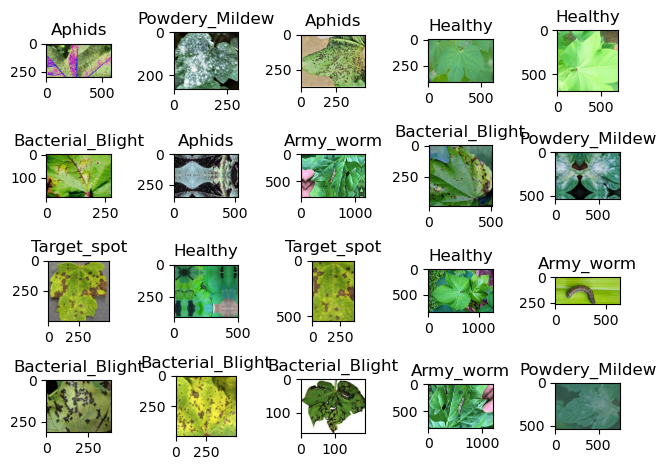

In [211]:
# plot this
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(image[i])
    plt.title(classes[label[i]])

plt.tight_layout()

In [212]:
#check shape
for i in range(10):
    print(image[i].shape)

(300, 576, 3)
(267, 301, 3)
(372, 461, 3)
(400, 610, 3)
(694, 694, 3)
(182, 276, 3)
(351, 527, 3)
(800, 1200, 3)
(484, 510, 3)
(542, 750, 3)


In [222]:
# reshape to (224,224)
X = []
for n,i in enumerate(image):
    X.append(resize(i,(224,224,3)))


In [223]:
# make it array
X = np.array(X)
y = np.array(label)

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
# split it to training and testing set
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 40,test_size=0.1)

In [226]:
print(f'shape of xtrain:',xtrain.shape)
print(f'shape of xtest:',xtest.shape)
print(f'shape of ytrain:',ytrain.shape)
print(f'shape of ytest:',ytest.shape)

shape of xtrain: (2142, 224, 224, 3)
shape of xtest: (238, 224, 224, 3)
shape of ytrain: (2142,)
shape of ytest: (238,)


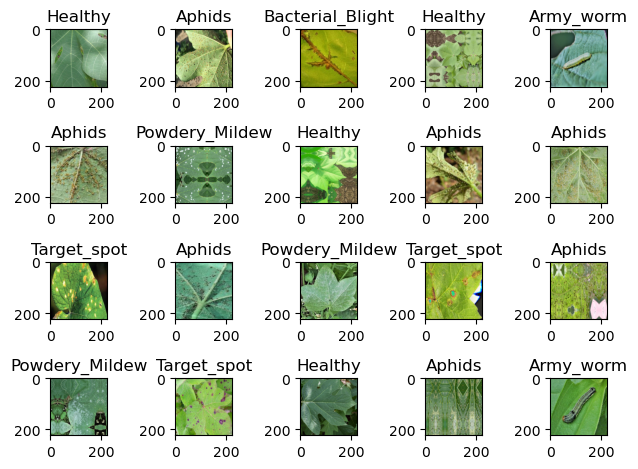

In [228]:
#plot this
for i in range (20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtrain[i])
    plt.title(classes[ytrain[i]])
    
plt.tight_layout()

# MobileNetV3 Pretrained model url

In [236]:
from tensorflow.keras.applications import MobileNetV3Small 

In [237]:
pre_trained = MobileNetV3Small(weights = 'imagenet',
              input_shape=(224,224,3),
              include_top=False)

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [238]:
pre_trained.trainable = False

### define no.of output classes

In [246]:
num_of_classes = 6

### create the model

In [248]:
model = keras.models.Sequential([
    pre_trained,
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(14,activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')

])
    

In [250]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [252]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,806,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,746,520 (10.48 MB)

 Trainable params: 1,807,400 (6.89 MB)

 Non-trainable params: 939,120 (3.58 MB)

In [254]:
model.fit(xtrain,ytrain,epochs = 10, validation_split = 0.2)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 578ms/step - accuracy: 0.1581 - loss: 2.1670 - val_accuracy: 0.1841 - val_loss: 1.7746
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 406ms/step - accuracy: 0.1939 - loss: 1.7876 - val_accuracy: 0.2867 - val_loss: 1.7106
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 407ms/step - accuracy: 0.2388 - loss: 1.7198 - val_accuracy: 0.2401 - val_loss: 1.7500
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 393ms/step - accuracy: 0.2487 - loss: 1.7253 - val_accuracy: 0.2657 - val_loss: 1.6368
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 376ms/step - accuracy: 0.2467 - loss: 1.6872 - val_accuracy: 0.2121 - val_loss: 1.6739
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 386ms/step - accuracy: 0.2338 - loss: 1.6930 - val_accuracy: 0.2681 - val_loss: 1.6521
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.2732 - loss: 1.6511 - val_accuracy: 0.2867 - val_loss: 1.6301
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 386ms/step - accuracy: 0.2754 - loss: 1.6586 - val_accu

In [256]:
#predict the model
ypred = model.predict(xtest)

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 720ms/step


In [265]:
ypred = [np.argmax(i) for i in ypred]

In [267]:
from sklearn.metrics import accuracy_score

In [269]:
accuracy_score(ytest,ypred)

0.15126050420168066

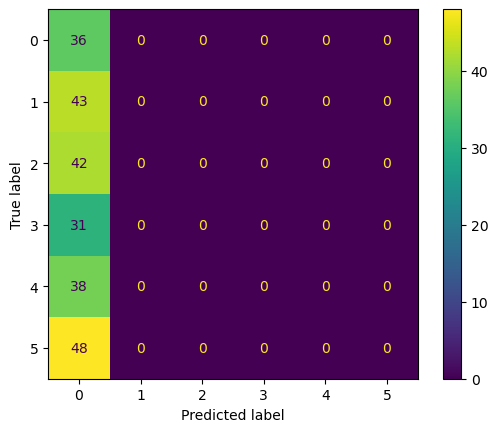

In [271]:
ConfusionMatrixDisplay.from_predictions(ytest,ypred)

In [ ]:
print(classification_report)